# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.





### Import all the necessary libraries

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [7]:
# complete the code below to load the dataset
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [8]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [9]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [10]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [11]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [12]:
# write your code here to print the numerical summary statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Getting the statistical summary for the categorical variables

In [13]:
# write your code here to print the categorical summary statistics
df.describe(include=['object'])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


### Check for missing values

In [14]:
# write your code here
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Check for duplicates

In [15]:
# write your code here  
df.duplicated().sum()

0

### Univariate Analysis

#### Time spent on the page

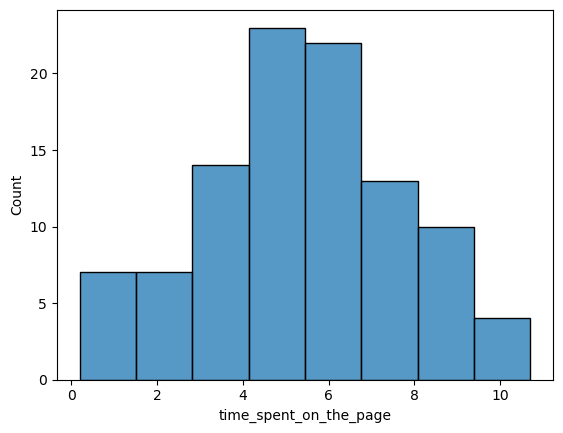

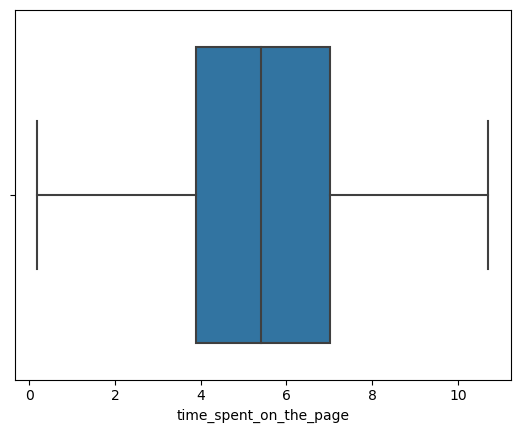

In [16]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Group

In [18]:
print(df['group'].value_counts())
print(df['language_preferred'].value_counts())

control      50
treatment    50
Name: group, dtype: int64
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


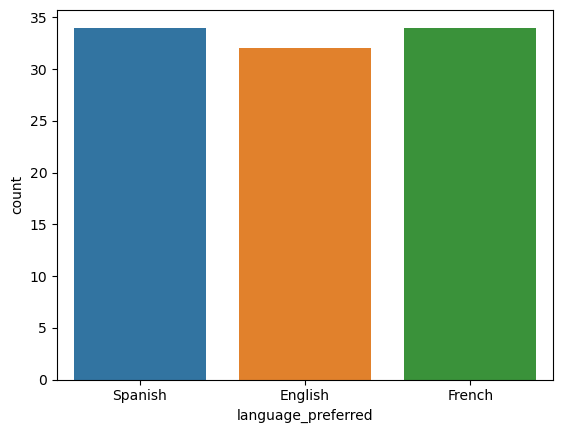

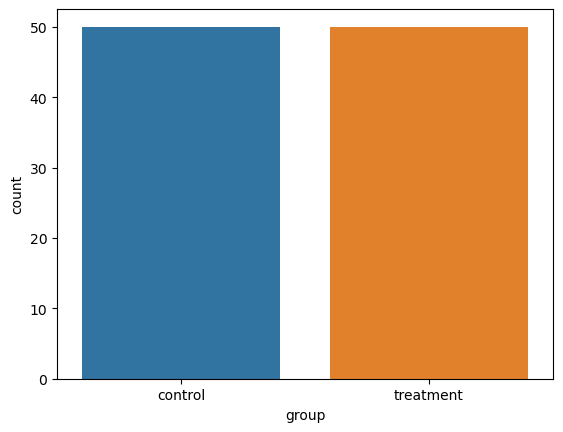

In [17]:
sns.countplot(data=df,x='language_preferred')
plt.show()
sns.countplot(data=df,x='group')
plt.show()

#### Landing page

In [19]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

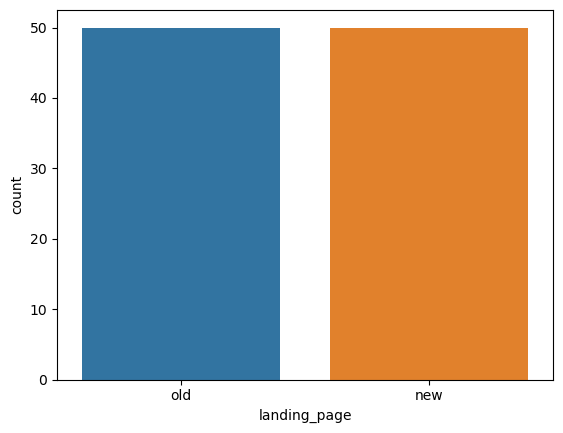

In [20]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [21]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

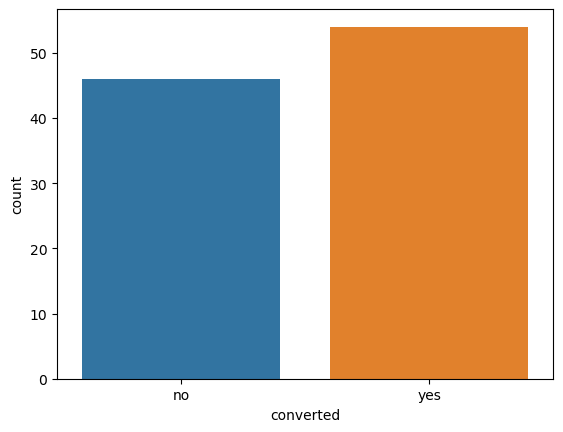

In [19]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.show()

#### Language preferred

In [22]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

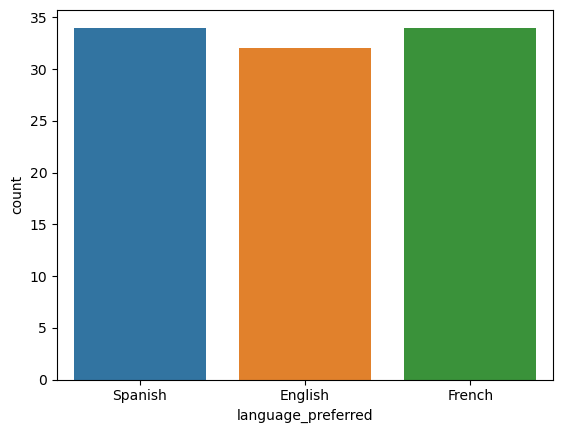

In [23]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

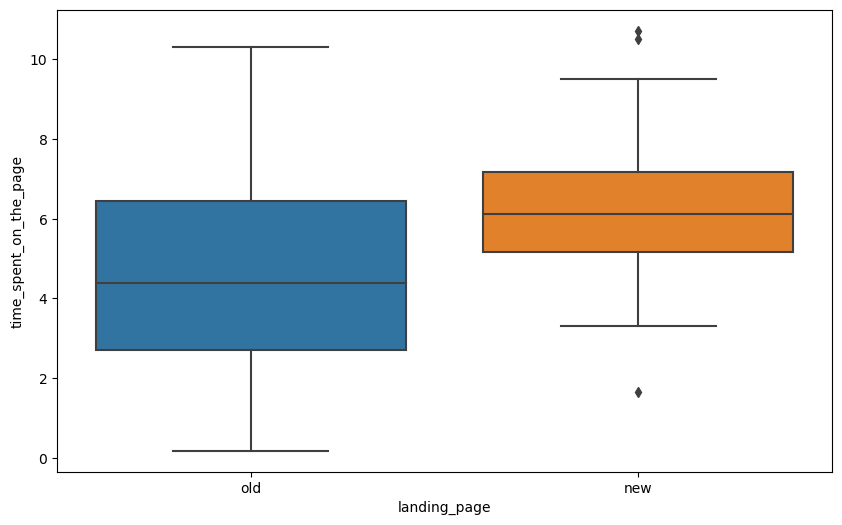

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Conversion status vs Time spent on the page

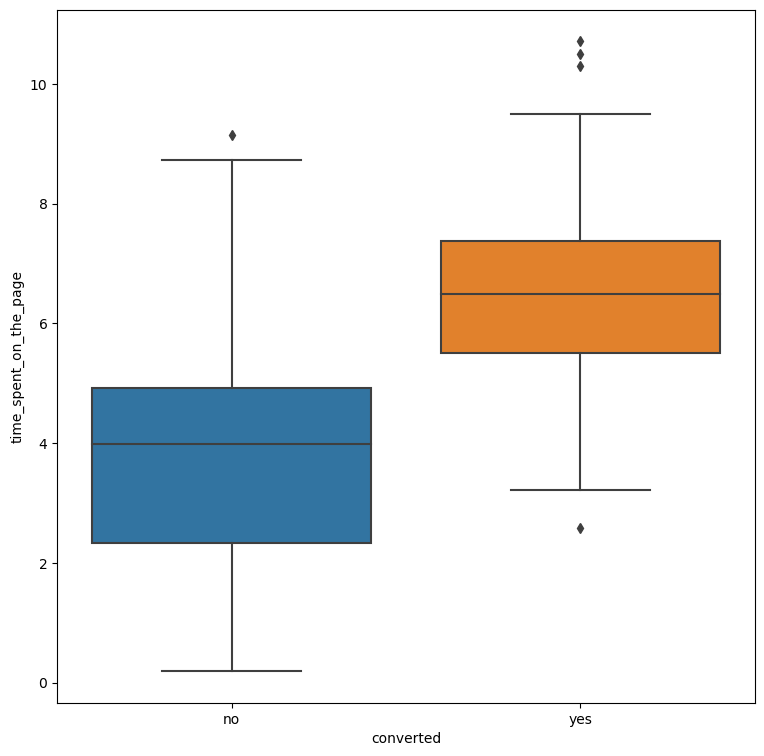

In [25]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y ='time_spent_on_the_page')
plt.show()

#### Language preferred vs Time spent on the page

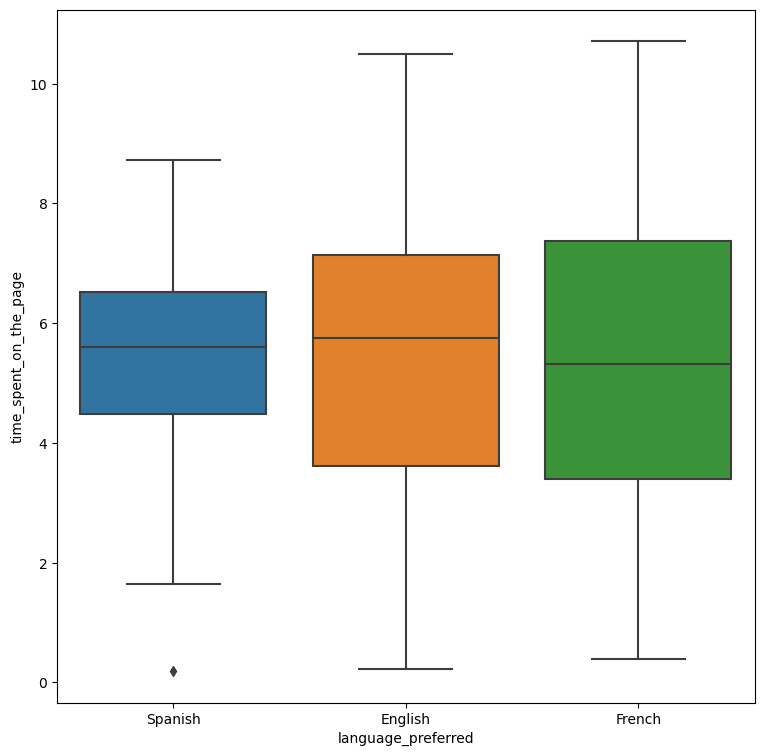

In [26]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x ='language_preferred', y ='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

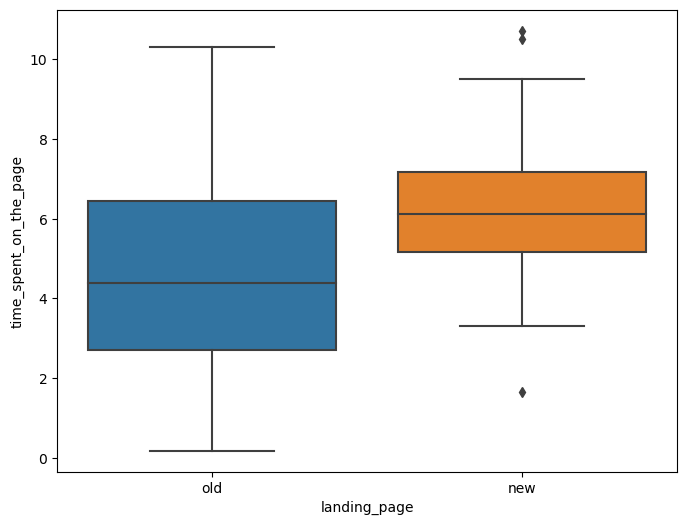

In [27]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: Users spend more time on the new landing page than existing landing page, miu1 => miu2

$H_a$: Users spend less time on the new landing page than existing landing page, miu1 < miu2



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are known.

The appropriate test is by using 2-sample ind. t-test

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [28]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [29]:
#mean
print('The sample mean of the time spent on the new page is:', round(time_spent_new.mean(),2))
print('The sample mean of the time spent on the old page is:', round(time_spent_old.mean(),2))
#standard deviation
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample mean of the time spent on the new page is: 6.22
The sample mean of the time spent on the old page is: 4.53
The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

we need to compare by plotting the std normal distribution and find the z-score.  Based on the result, we can assume both groups are not equal.

In [41]:
#find the z-score
new_page = (6.22-5.38) / 1.82
print('The Z-score of the time spent on the new page is:', new_page)
old_page = (5.38-4.53) / 2.58
print('The Z-score of the time spent on the old page is:', old_page)

The Z-score of the time spent on the new page is: 0.46153846153846145
The Z-score of the time spent on the old page is: 0.32945736434108513


In [31]:
# set the values of population mean and standard deviation respectively
#mu, sigma = 6.22, 1.82

# set the value sample mean
#x_bar = 80

# calculate the test statistic
#test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
#test_stat

243.23076923076923

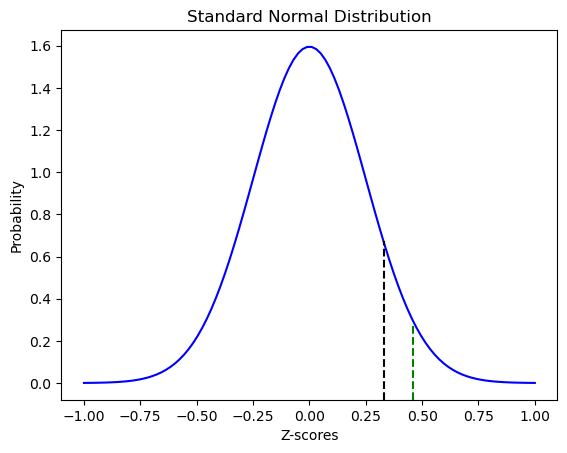

In [66]:
# import the required function
from scipy.stats import norm

# plot the standard normal distribution
# and visualize the standardized scores
# We are plotting the distributions here to better visualize the calculations.
fig, ax = plt.subplots()
x = np.linspace(-1,1,100)
ax.plot(x, norm.pdf(x, loc = 0, scale = 0.25), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(new_page, ymax = 0.2, linestyle = '--', color = 'green')
ax.axvline(old_page, ymax = 0.43, linestyle = '--', color = 'black')
plt.show()

### Step 5: Calculate the p-value

In [32]:
# complete the code to import the required function
from scipy.stats import ttest_ind 

# write the code to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = True, alternative = 'less')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.9998683876471904


### Step 6: Compare the p-value with $\alpha$

In [33]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.9998683876471904 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

(p=0.9998607618774834)>(α=0.05)

Therefore, we fail to reject the null hypothesis.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

converted       no   yes
landing_page            
new           0.34  0.66
old           0.58  0.42


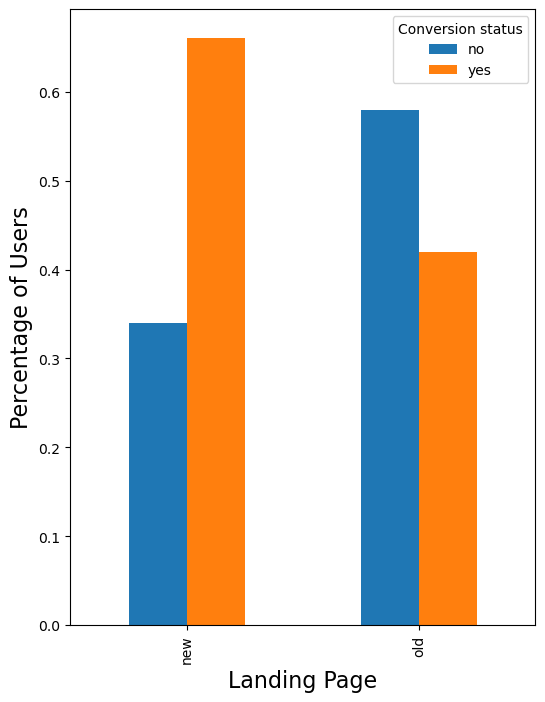

In [16]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
#pd.crosstab(df[df['landing_page']],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)

crosstb = pd.crosstab(df['landing_page'], df['converted'],normalize='index')
print(crosstb)

crosstb.plot(kind="bar",figsize=(6,8))
plt.xlabel("Landing Page", fontsize = 16)
plt.ylabel("Percentage of Users", fontsize = 16)
plt.legend(title="Conversion status")
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion rate for new page equal and greater than old page, miu1>=miu2

$H_a:$ Conversion rate for new page is lower than old page, miu1<miu2



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

the appropriate test would be 2-proportion z-test

Binomally distributed population - Yes, a it is either converted or not converted.
Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [17]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [18]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest  

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='smaller')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.9919736917959437


### Step 6: Compare the p-value with $\alpha$

In [19]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.9919736917959437 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

(p=0.9919736917959437)<(α=0.05) we fail to reject the null hypothesis.

## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

converted                 no       yes
language_preferred                    
English             0.343750  0.656250
French              0.558824  0.441176
Spanish             0.470588  0.529412


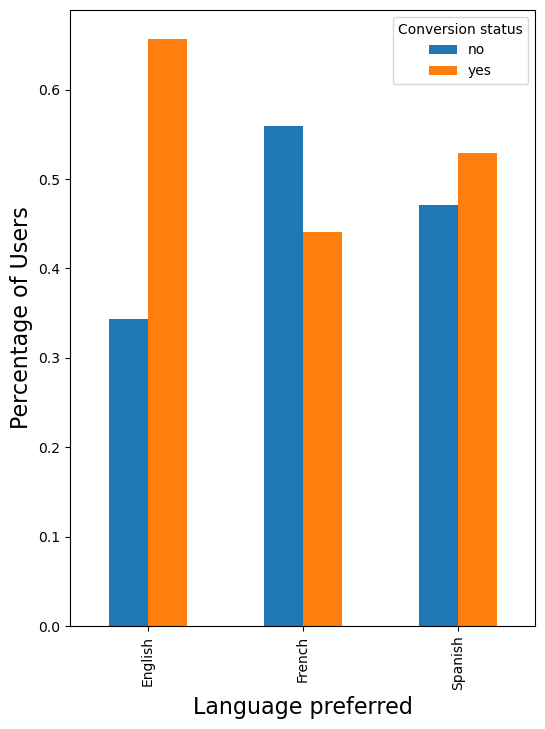

In [20]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
#pd.crosstab(df[_________],df[_________],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)


crosstb_1 = pd.crosstab(df['language_preferred'], df['converted'],normalize='index')
print(crosstb_1)

crosstb_1.plot(kind="bar",figsize=(6,8))
plt.xlabel("Language preferred", fontsize = 16)
plt.ylabel("Percentage of Users", fontsize = 16)
plt.legend(title="Conversion status")
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion status is not depend on language preferred

$H_a:$ Conversion status depend on the language preferred



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

Categorical variables - Yes
Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can try to use chi-square test

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [24]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [27]:
# complete the code to import the required function
from scipy.stats import chi2_contingency  

# write the code to calculate the p-value
chi, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", exp_freq)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [28]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [29]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

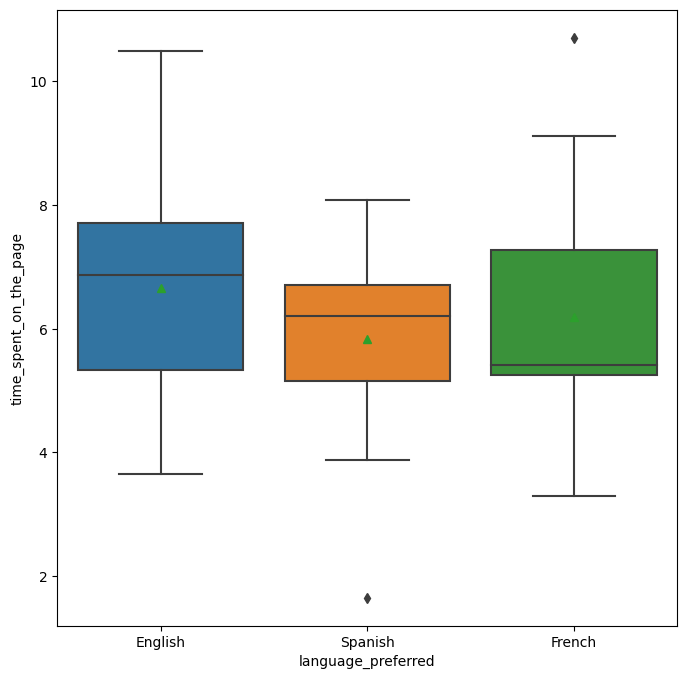

In [30]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x ='language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [31]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])[['time_spent_on_the_page']].mean()


,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Step 1: Define the null and alternate hypotheses

$H_0:$ miu1=miu2=miu3

$H_a:$ At least either one is different



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**

ANOVA

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [33]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   # complete your code here

In [35]:
#Testing for Shapiro-Wilk test

#Null hypothesis: Time spent on the page follows normal distribution
#Alternative hypothesis: Time spent on the page does not follows normal distribution
from scipy import stats

w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

#P-value OK, follows normal distribution

The p-value is 0.5643193125724792


In [46]:
# Testing for Levene's test

#Null hypothesis: Time spent on the page population variance is equal
#Alternative hypothesis: Time spent on the page population variance is not equal

#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene

statistic, p_value = levene(time_spent_English,time_spent_French,time_spent_Spanish)
# find the p-value
print('The p-value is', p_value)

#P-value OK, follows population variance is equal

The p-value is 0.46711357711340173


### Step 5: Calculate the p-value

In [47]:
# complete the code to import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [48]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

## Conclusion and Business Recommendations


___